# **Prediction using Decision Tree  Algorithm**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn import tree
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("data_iris (1).csv")

In [ ]:
df.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.shape

(150, 5)

In [ ]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

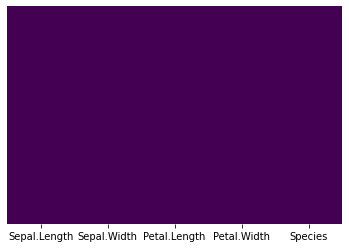

In [ ]:
#Now, we check whether our data needs cleaning.For that,we plot a heatmap or our entire dataset,highlighting all null values (if any)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df.head(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


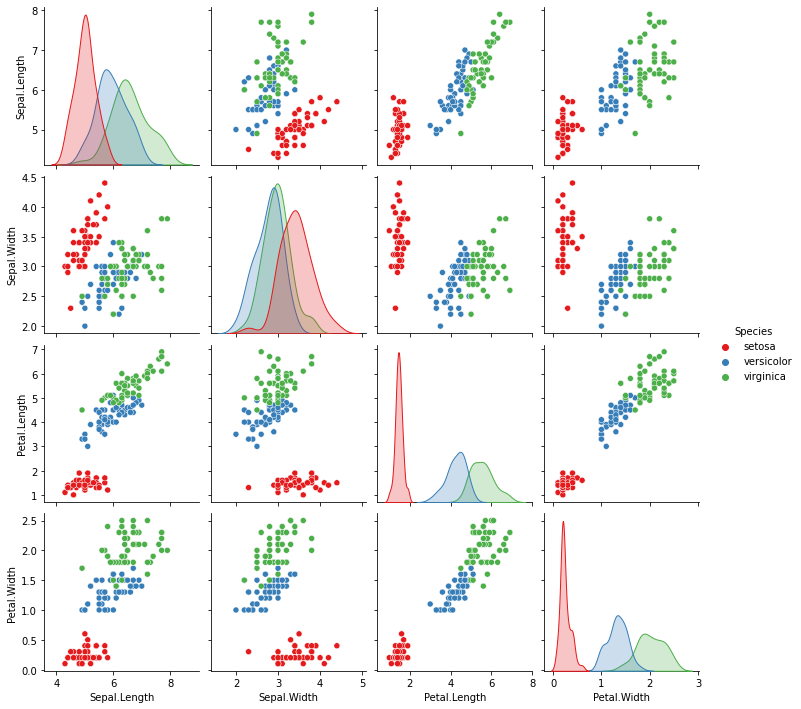

In [ ]:
sns.pairplot(df,hue = 'Species',palette='Set1')

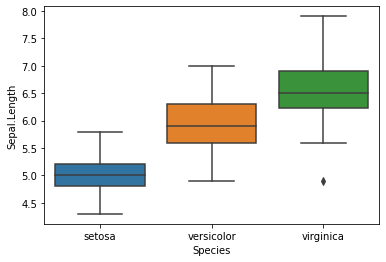

In [ ]:
sns.boxplot(x="Species",y="Sepal.Length",data =df)

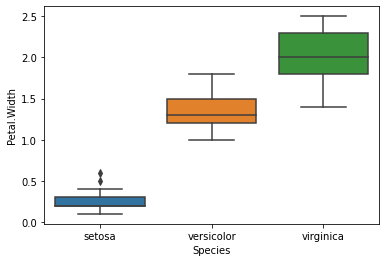

In [ ]:
sns.boxplot(x="Species",y="Petal.Width", data=df)

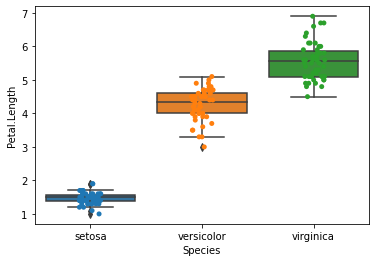

In [ ]:
plot = sns.boxplot(x="Species", y="Petal.Length", data=df)
plot = sns.stripplot(x="Species",y="Petal.Length",data=df,jitter=True,edgecolor="black")

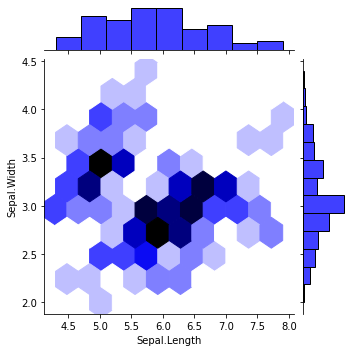

In [ ]:
sns.jointplot(x="Sepal.Length",y="Sepal.Width",data=df,height=5,ratio=5,kind="hex",color="blue")

In [ ]:
data = df.sample(frac=1)

In [ ]:
df.head(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


ENCODE TARGET DATA

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
label_encode = LabelEncoder()

In [ ]:
data['Encoded Species'] = label_encode.fit_transform(data['Species'])

In [ ]:
data.head(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Encoded Species
56,6.3,3.3,4.7,1.6,versicolor,1
17,5.1,3.5,1.4,0.3,setosa,0
77,6.7,3.0,5.0,1.7,versicolor,1
149,5.9,3.0,5.1,1.8,virginica,2
35,5.0,3.2,1.2,0.2,setosa,0


In [ ]:
#Converting label columns into an Array
enc_data = label_encode.fit_transform(data['Species'])
enc_data

array([1, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 2, 2, 0, 2, 0,
       1, 2, 0, 0, 2, 0, 1, 2, 2, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 1,
       2, 1, 1, 0, 2, 2, 1, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2, 1,
       0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1,
       0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 1, 0, 2, 1, 1,
       0, 1, 0, 1, 2, 0, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 0, 1,
       2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 2])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
iris = datasets.load_iris()
x = iris.data[:, [2, 3]]

In [ ]:
x

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [ ]:
data.shape

(150, 6)

In [ ]:
x.shape

(150, 2)

In [ ]:
y = iris.target
y



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
x_train , x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 100)

# Building the decision tree model,training and predictions

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
predictions = dtree.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
print(confusion_matrix(y_test,predictions))

[[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]


DT model accuracy: 0.9574468085106383


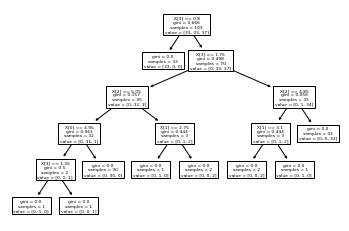

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=50)
feature_names = iris.feature_names 
target_names = iris.target_names 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31)
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf)
# making predictions on the testing set 
y_pred = clf.predict(X_test)
from sklearn import metrics
print("DT model accuracy:", metrics.accuracy_score(y_test, y_pred))